In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from importlib import reload


# tcxp.py and titanic_preproc.py are available at: 
#    https://github.com/YuxiGlobal/data-analytics/tree/master/tree_classif_explain
from tcxp import rf_explain, as_pyplot_figure
#reload( tcxp )
from titanic_preproc import preproc

train_df = pd.read_csv( "c:/tmp/titanic/train.csv" )
train_df, train_Y = preproc( train_df )

In [6]:
train_df.shape

(891, 9)

In [7]:
train_df.iloc[list(range(8)) + [14, 305],:-2]

,Pclass,Age,SibSp,Parch,Fare,age_unknown,sex_female
0,3,22.00,1,0,7.2500,0.0,0.0
1,1,38.00,1,0,71.2833,0.0,1.0
2,3,26.00,0,0,7.9250,0.0,1.0
3,1,35.00,1,0,53.1000,0.0,1.0
4,3,35.00,0,0,8.0500,0.0,0.0
5,3,-99.00,0,0,8.4583,1.0,0.0
6,1,54.00,0,0,51.8625,0.0,0.0
7,3,2.00,3,1,21.0750,0.0,0.0
14,3,14.00,0,0,7.8542,0.0,1.0
305,1,0.92,1,2,151.5500,0.0,0.0


In [8]:
rfc = RandomForestClassifier( n_estimators=100, max_depth=5 )
rfc.fit( train_df, train_Y)
train_pred = rfc.predict( train_df )
accu = (train_pred == train_Y).sum() / len( train_pred )
accu

0.8484848484848485

In [9]:
tc_exps, p0  = rf_explain( rfc, train_df) 

(<matplotlib.figure.Figure at 0x23c8a1b5fd0>,)

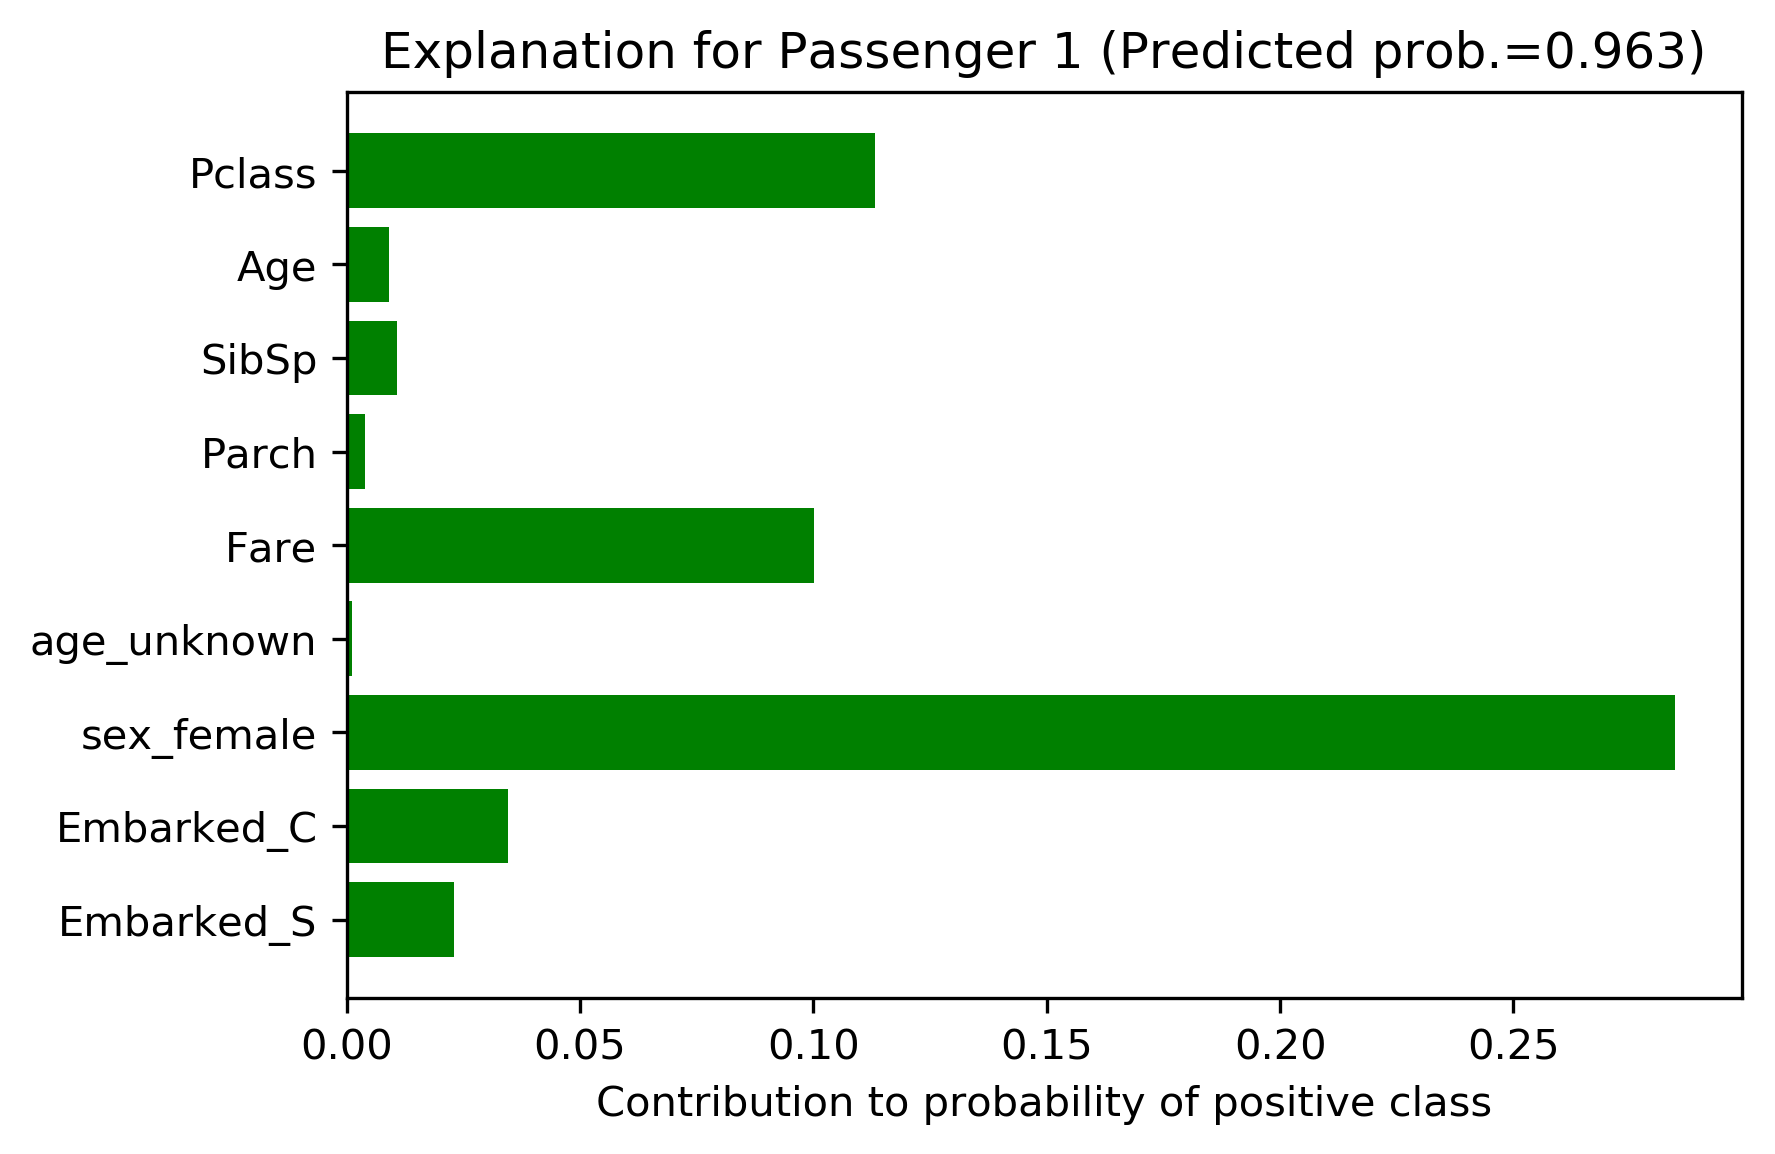

In [13]:
as_pyplot_figure( tc_exps[1], p0, train_df.columns, 'Passenger 1'),

(<matplotlib.figure.Figure at 0x23c8b7f9588>,)

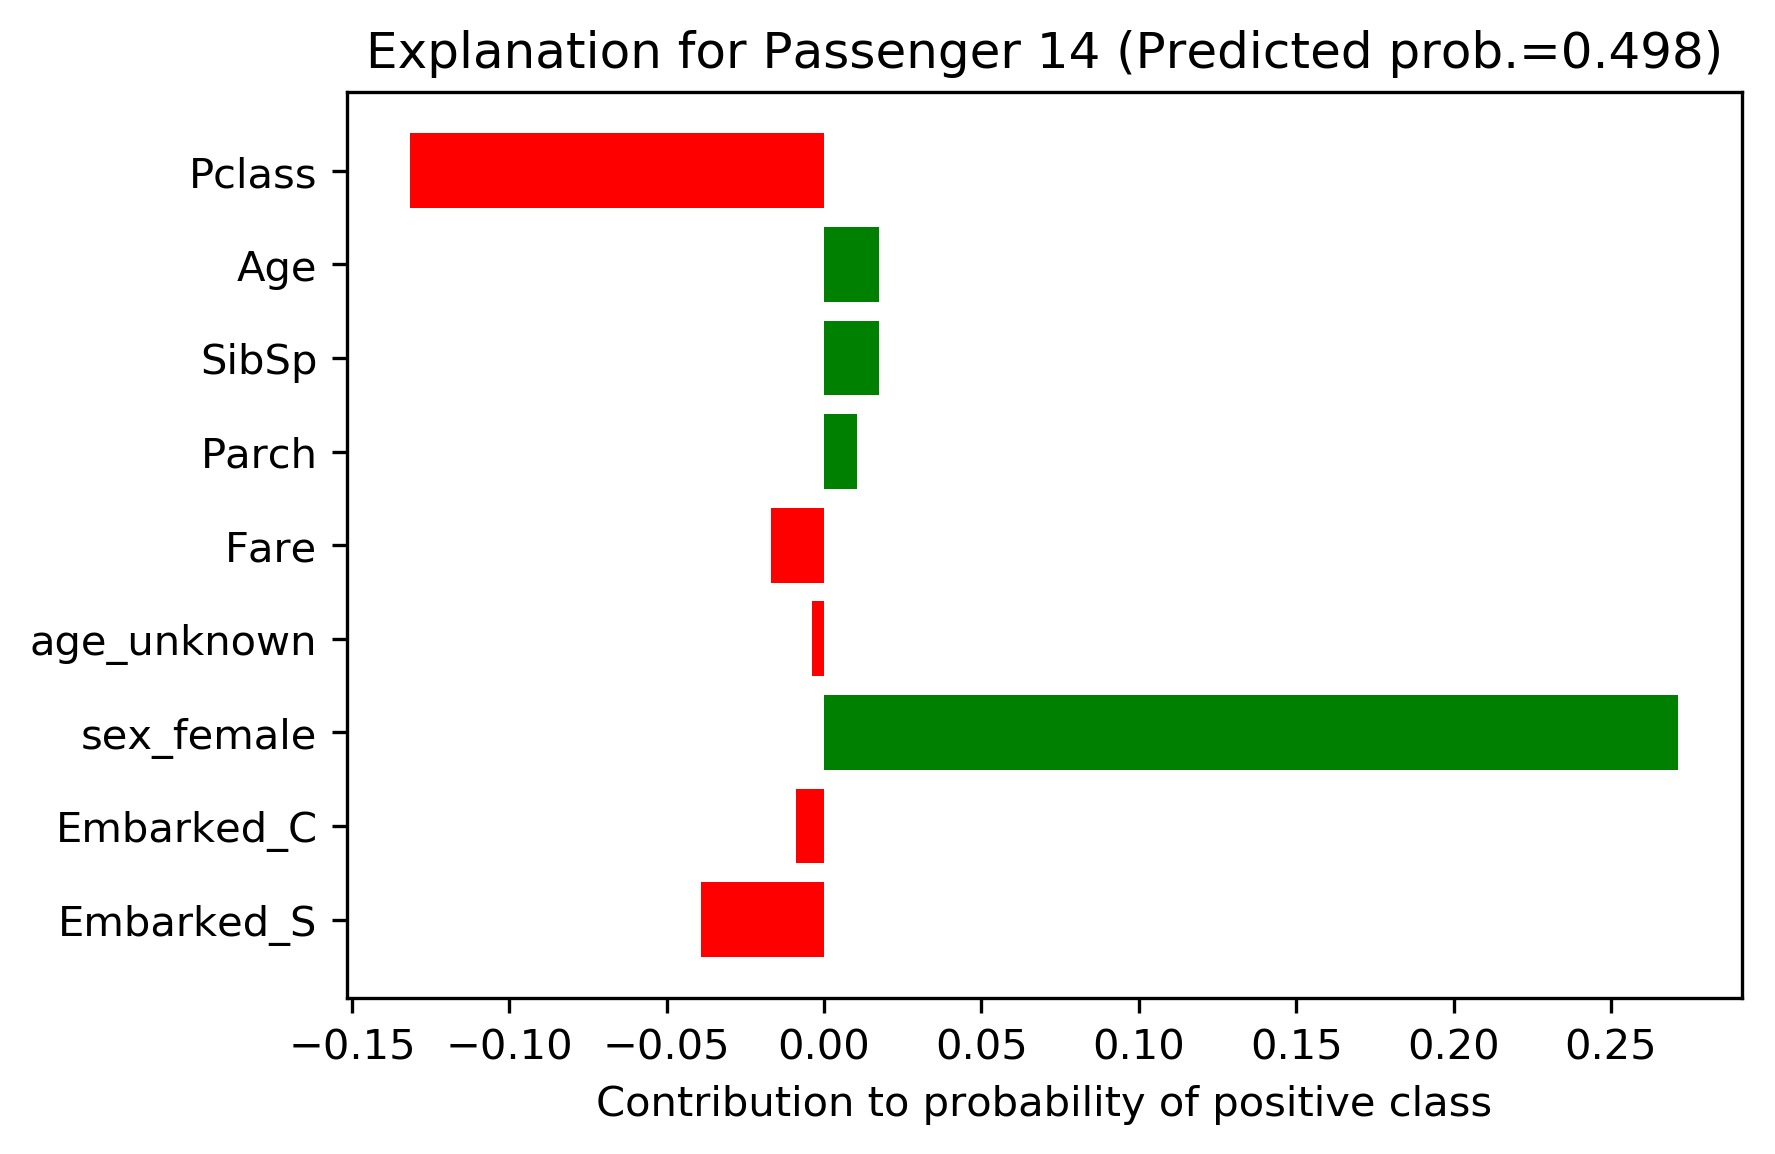

In [15]:
as_pyplot_figure( tc_exps[14], p0, train_df.columns, 'Passenger 14' ),

(<matplotlib.figure.Figure at 0x23c8c87e0f0>,)

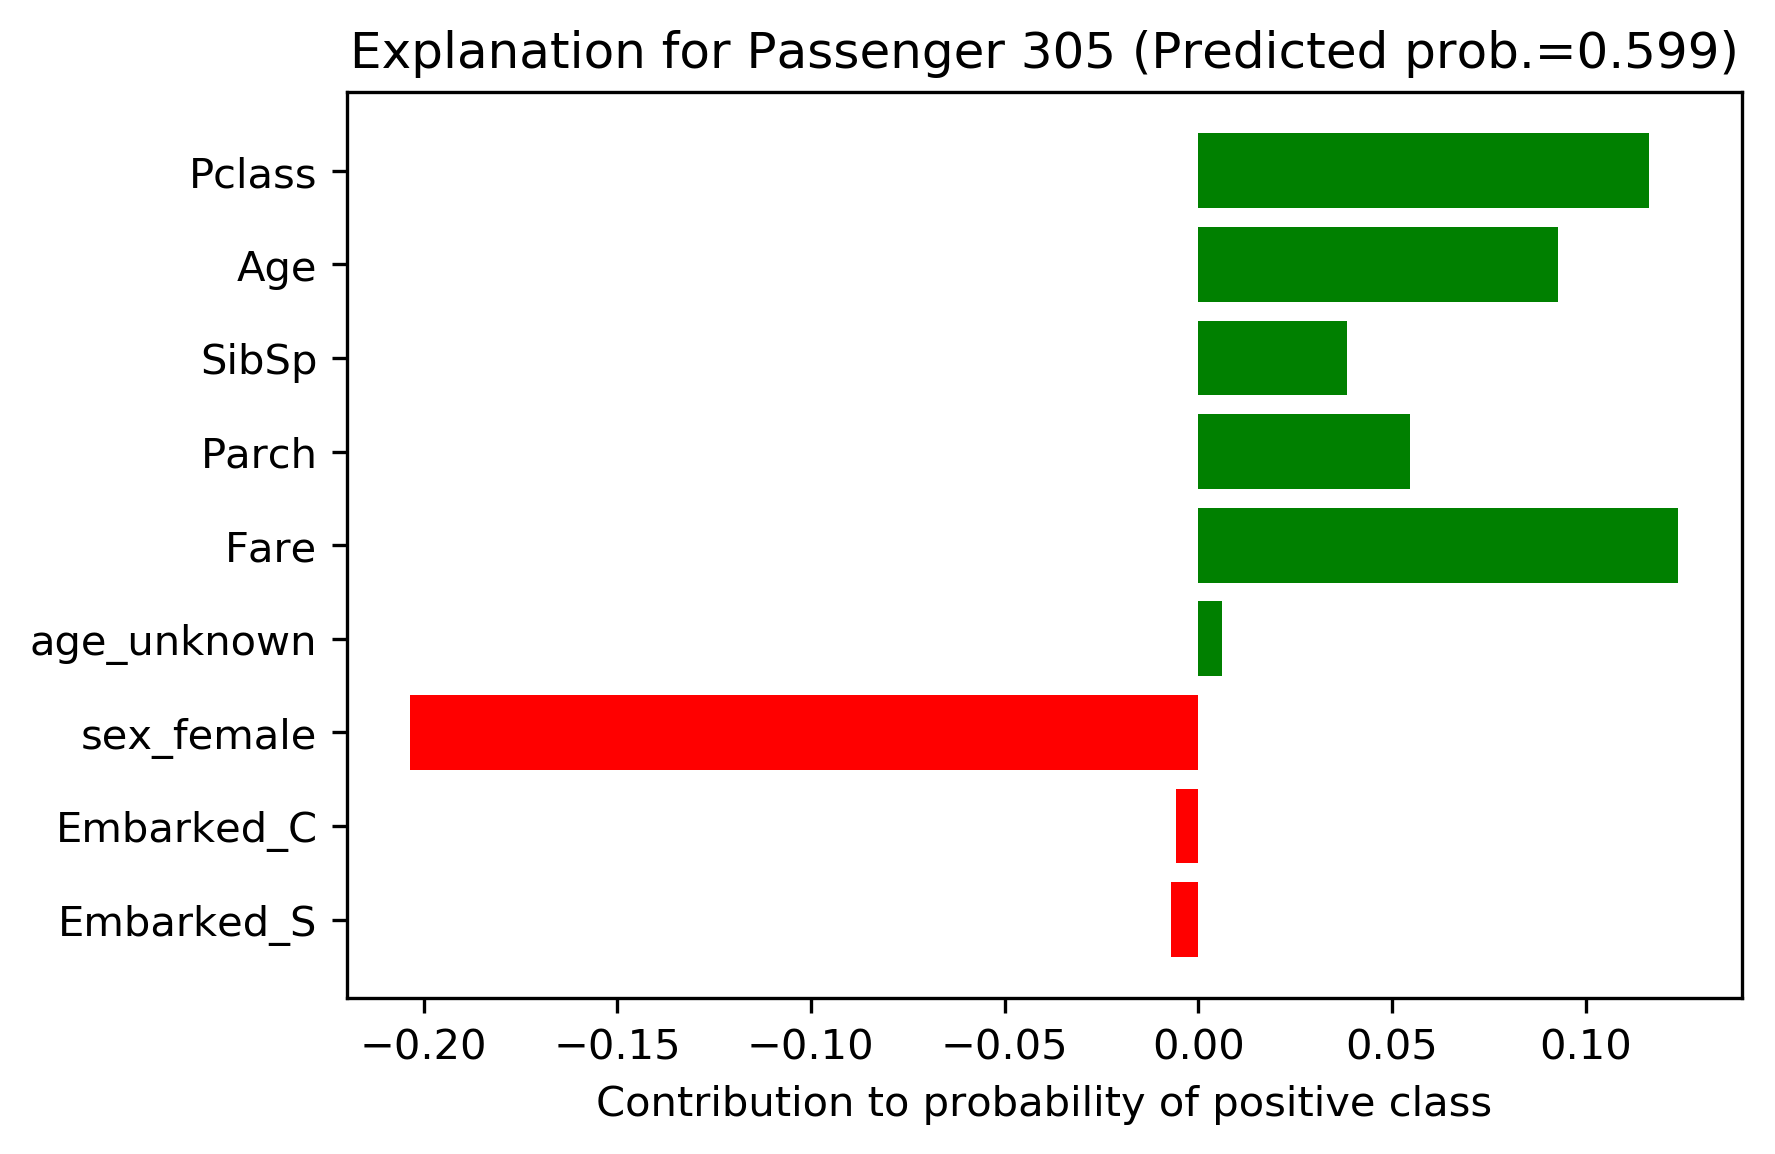

In [16]:
idx = 305
as_pyplot_figure( tc_exps[idx], p0, train_df.columns, 'Passenger 305' ),